In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv("/content/drive/MyDrive/NLP(Classes)/spam.csv")
df.shape

(5572, 2)

In [3]:
df.head()

,Category,Message
0,not spam,"Go until jurong point, crazy.. Available only ..."
1,not spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,not spam,U dun say so early hor... U c already then say...
4,not spam,"Nah I don't think he goes to usf, he lives aro..."


## **WordCloud**

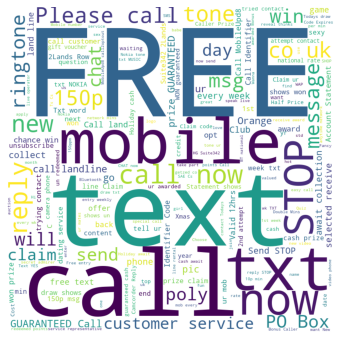

In [4]:
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ='white',  
               min_font_size = 10)

wc.generate(''.join(df[df["Category"]=="spam"]["Message"]))

plt.figure(figsize = (6,6)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

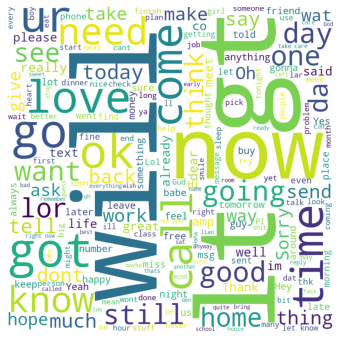

In [5]:
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ='white',  
               min_font_size = 10)

wc.generate(''.join(df[df["Category"]=="not spam"]["Message"]))

plt.figure(figsize = (6,6)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

In [6]:
# feature and target
X = df["Message"]
y = df["Category"]

In [7]:
y.head()

0    not spam
1    not spam
2        spam
3    not spam
4    not spam
Name: Category, dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()
y = le.fit_transform(y)

In [10]:
y

array([0, 0, 1, ..., 0, 0, 0])

## **Dividing into training and testing data**

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

**COUNT** **VECTORIZER**

In [13]:
cv = CountVectorizer(stop_words="english")
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [15]:
#Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train_cv,y_train)

DecisionTreeClassifier()

In [16]:
y_pred = dt.predict(X_test_cv)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1442
           1       0.91      0.88      0.89       230

    accuracy                           0.97      1672
   macro avg       0.94      0.93      0.94      1672
weighted avg       0.97      0.97      0.97      1672



**TF-IDF** **VECTORIZER**

In [17]:
# tfidf

tf = TfidfVectorizer(stop_words="english")
X_train_tf = tf.fit_transform(X_train)
X_test_tf = tf.transform(X_test)

In [18]:
#Decision Tree
dt2 = DecisionTreeClassifier()
dt2.fit(X_train_tf,y_train)

DecisionTreeClassifier()

In [19]:
y_pred = dt2.predict(X_test_tf)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1442
           1       0.90      0.82      0.86       230

    accuracy                           0.96      1672
   macro avg       0.94      0.90      0.92      1672
weighted avg       0.96      0.96      0.96      1672



## Spam sms application

In [20]:
sms1 = "Hello, how are you? let's meet someday"

sms2 = "FREE mobile, No money required, Come and claim it"

In [21]:
def predict_sms(sms):
    sms_cv = cv.transform([sms])
    prediction = dt.predict(sms_cv)
    return le.inverse_transform(prediction)[0]

In [22]:
predict_sms(sms1)

'not spam'

In [23]:
predict_sms(sms2)

'spam'